In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import os
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf


mpl.rcParams['figure.figsize'] = (14, 12)
mpl.rcParams['axes.grid'] = False


# Code inspired by https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

# Also try to experiment with pytorch-ts python library : https://github.com/zalandoresearch/pytorch-ts

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95082 entries, 0 to 30
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            95082 non-null  float64
 1   served_request  95082 non-null  int64  
 2   request_rate    95082 non-null  int64  
 3   response_time   95082 non-null  float64
 4   performance     95082 non-null  float64
 5   cpu_usage       95082 non-null  float64
 6   memory          95082 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 5.8 MB


request_rate     95082
response_time    95082
performance      95082
cpu_usage        95082
memory           95082
dtype: int64

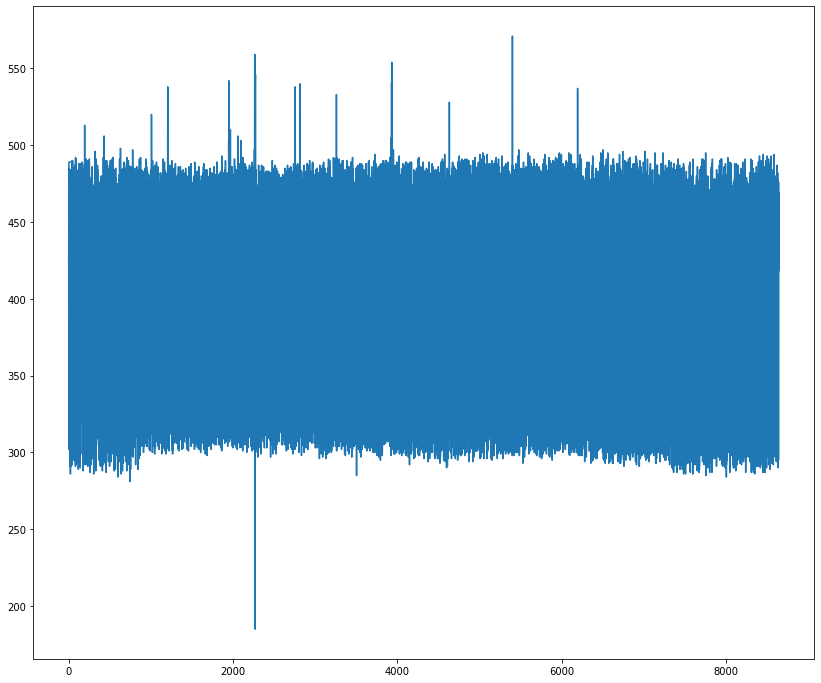

In [2]:
#data = pd.read_csv('/home/giwrikas/Downloads/Jean_Didier_flask-response_time.csv')
#data = pd.read_csv('/home/giwrikas/Downloads/all-4 (1).csv')
data_0 = pd.read_csv('/home/giwrikas/Downloads/Morphemic_datasets/result_0.csv',  error_bad_lines=False)
data_1 = pd.read_csv('/home/giwrikas/Downloads/Morphemic_datasets/result_1.csv',  error_bad_lines=False)
data_2 = pd.read_csv('/home/giwrikas/Downloads/Morphemic_datasets/result_2.csv',  error_bad_lines=False)
data_3 = pd.read_csv('/home/giwrikas/Downloads/Morphemic_datasets/result_3.csv',  error_bad_lines=False)
data_4 = pd.read_csv('/home/giwrikas/Downloads/Morphemic_datasets/result_4.csv',  error_bad_lines=False)
data_5 = pd.read_csv('/home/giwrikas/Downloads/Morphemic_datasets/result_5.csv',  error_bad_lines=False)
data_6 = pd.read_csv('/home/giwrikas/Downloads/Morphemic_datasets/result_6.csv',  error_bad_lines=False)
data_7 = pd.read_csv('/home/giwrikas/Downloads/Morphemic_datasets/result_7.csv',  error_bad_lines=False)
data_8 = pd.read_csv('/home/giwrikas/Downloads/Morphemic_datasets/result_8.csv',  error_bad_lines=False)
data_9 = pd.read_csv('/home/giwrikas/Downloads/Morphemic_datasets/result_9.csv',  error_bad_lines=False)
data_10 = pd.read_csv('/home/giwrikas/Downloads/Morphemic_datasets/result_10.csv',  error_bad_lines=False)
data_11 = pd.read_csv('/home/giwrikas/Downloads/Morphemic_datasets/result_11.csv',  error_bad_lines=False)


data = pd.concat([data_0, data_1, data_2, data_3, data_4, data_5, 
                  data_6, data_7, data_8, data_9, data_10, data_11], axis=0)
columns = data.columns
data['request_rate'].plot()
data.isna().sum()
data.info()
data.count().tail()

In [3]:
data_0.head()

,time,served_request,request_rate,response_time,performance,cpu_usage,memory
0,1.602539e+09,2110,426,673.574009,0.626509,31.6,71798784
1,1.602539e+09,1845,314,132.285077,2.774311,25.8,65302528
2,1.602539e+09,2284,461,3.297176,139.816605,36.1,65859584
3,1.602539e+09,2354,469,3.262062,143.774081,36.9,65826816
4,1.602539e+09,2301,463,3.245653,142.652344,36.9,65777664


In [4]:
data_1.head()

,time,served_request,request_rate,response_time,performance,cpu_usage,memory
0,1.602625e+09,2308,461,3.213698,143.137267,37.0,66543616
1,1.602625e+09,2330,467,3.074882,151.875749,37.2,66027520
2,1.602625e+09,2373,464,3.695877,125.545317,36.9,66207744
3,1.602625e+09,2348,467,3.398098,137.429802,37.7,66453504
4,1.602625e+09,2323,464,3.433710,135.130801,36.9,66256896


In [5]:
data_2.head()

,time,served_request,request_rate,response_time,performance,cpu_usage,memory
0,1.602711e+09,2152,432,668.218478,0.643502,32.1,72433664
1,1.602711e+09,2132,426,669.079011,0.636696,32.0,71876608
2,1.602711e+09,2151,427,674.423917,0.637581,31.9,71966720
3,1.602711e+09,2135,425,658.576078,0.649887,31.8,71933952
4,1.602711e+09,2100,419,678.298991,0.619196,31.3,71835648


In [6]:
data.head()

,time,served_request,request_rate,response_time,performance,cpu_usage,memory
0,1.602539e+09,2110,426,673.574009,0.626509,31.6,71798784
1,1.602539e+09,1845,314,132.285077,2.774311,25.8,65302528
2,1.602539e+09,2284,461,3.297176,139.816605,36.1,65859584
3,1.602539e+09,2354,469,3.262062,143.774081,36.9,65826816
4,1.602539e+09,2301,463,3.245653,142.652344,36.9,65777664


In [7]:
 data_0.shape, data_1.shape, data_2.shape, data.shape

((8641, 7), (8641, 7), (8641, 7), (95082, 7))

In [8]:
data = data.round(decimals=2)

In [9]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_df = missing_value_df.reset_index()
missing_value_df = missing_value_df.drop(columns=['index'])
missing_value_df.sort_values('percent_missing', inplace=True, ascending = False)
missing_value_df

,column_name,percent_missing
0,time,0.0
1,served_request,0.0
2,request_rate,0.0
3,response_time,0.0
4,performance,0.0
5,cpu_usage,0.0
6,memory,0.0


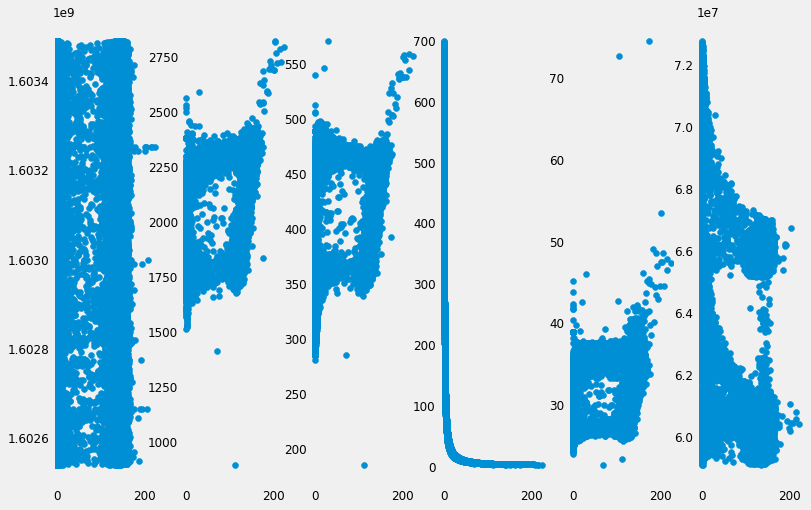

In [257]:
#data_2 = data[['memory_alloc', 'cpu_alloc', 'performance','number_instances']]
fig, axes = plt.subplots(ncols=len(data.drop(columns=['performance']).columns))
for i, yvar in enumerate(data.drop(columns=['performance']).columns):
    axes[i].scatter(data['performance'],data[yvar])

In [258]:
for i in data['time']:
    data['time'].replace(i,pd.Timestamp(i, unit='s'), inplace=True)
    #print(data['time'][i])

### This looks much more quickly

In [14]:
data['time'] = pd.to_datetime(data['time'], unit='s')

In [15]:
data.head()

,time,served_request,request_rate,response_time,performance,cpu_usage,memory
0,2020-10-12 21:37:07.769999981,2110,426,673.57,0.63,31.6,71798784
1,2020-10-12 21:37:17.769999981,1845,314,132.29,2.77,25.8,65302528
2,2020-10-12 21:37:27.769999981,2284,461,3.30,139.82,36.1,65859584
3,2020-10-12 21:37:37.769999981,2354,469,3.26,143.77,36.9,65826816
4,2020-10-12 21:37:47.769999981,2301,463,3.25,142.65,36.9,65777664


In [16]:
data = data.set_index('time')
data.head()

,served_request,request_rate,response_time,performance,cpu_usage,memory
time,,,,,,
2020-10-12 21:37:07.769999981,2110,426,673.57,0.63,31.6,71798784
2020-10-12 21:37:17.769999981,1845,314,132.29,2.77,25.8,65302528
2020-10-12 21:37:27.769999981,2284,461,3.30,139.82,36.1,65859584
2020-10-12 21:37:37.769999981,2354,469,3.26,143.77,36.9,65826816
2020-10-12 21:37:47.769999981,2301,463,3.25,142.65,36.9,65777664


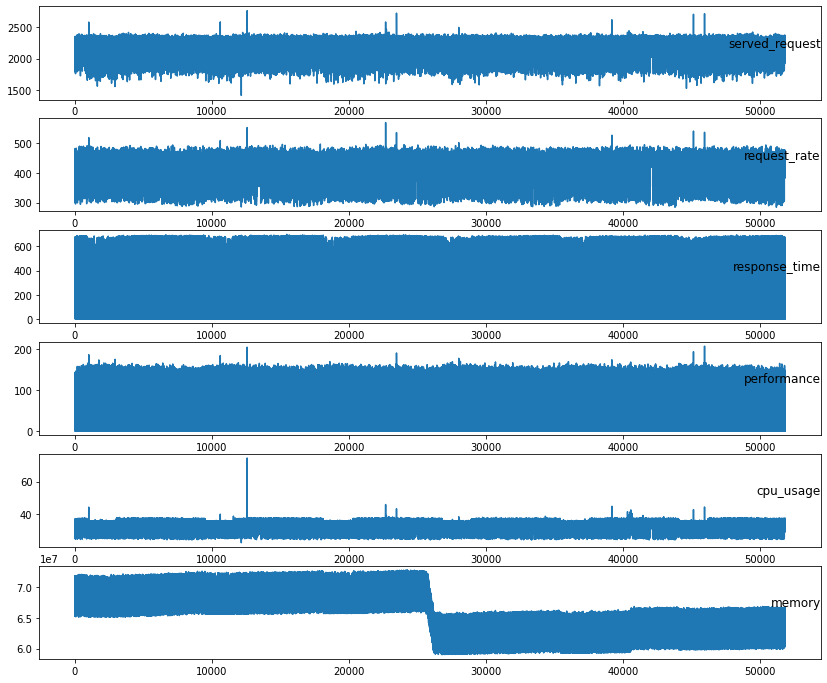

In [15]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
values = data.values
# specify columns to plot
groups = [0, 1, 2, 3, 4,5]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(data.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

### Closer...

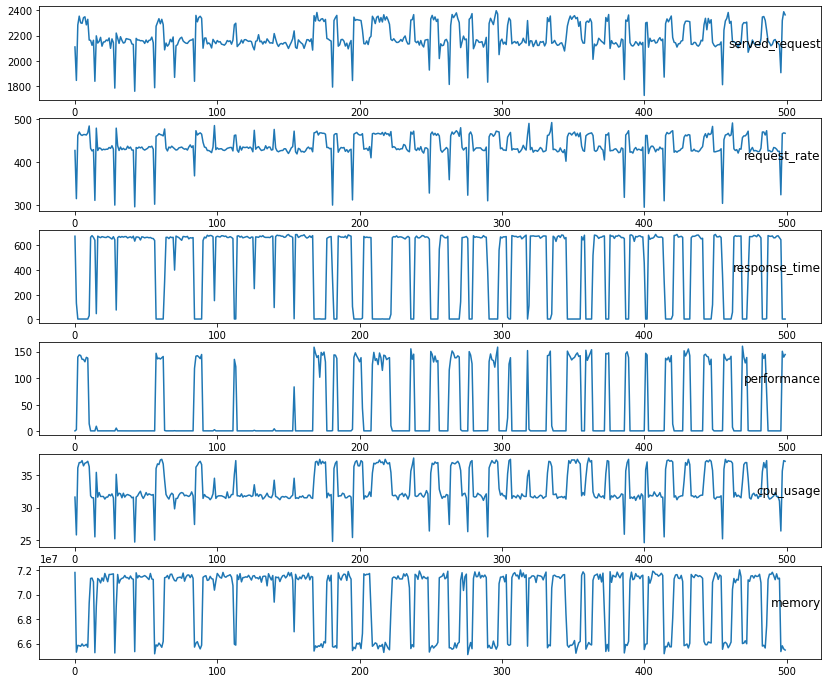

In [16]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
values = data[:500].values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(data.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

### Keep only Request rate which is the depedent variable in our case and cpu_usage + memory as independent variables

In [17]:
data_ = data[['request_rate', 'cpu_usage', 'memory']]

In [18]:
data_

,request_rate,cpu_usage,memory
time,,,
2020-10-12 21:37:07.769999981,426,31.6,71798784
2020-10-12 21:37:17.769999981,314,25.8,65302528
2020-10-12 21:37:27.769999981,461,36.1,65859584
2020-10-12 21:37:37.769999981,469,36.9,65826816
2020-10-12 21:37:47.769999981,463,36.9,65777664
...,...,...,...
2020-10-23 21:41:27.769999981,489,38.9,66756608
2020-10-23 21:41:37.769999981,489,38.9,66756608
2020-10-23 21:41:47.769999981,489,38.9,66756608


### Resample

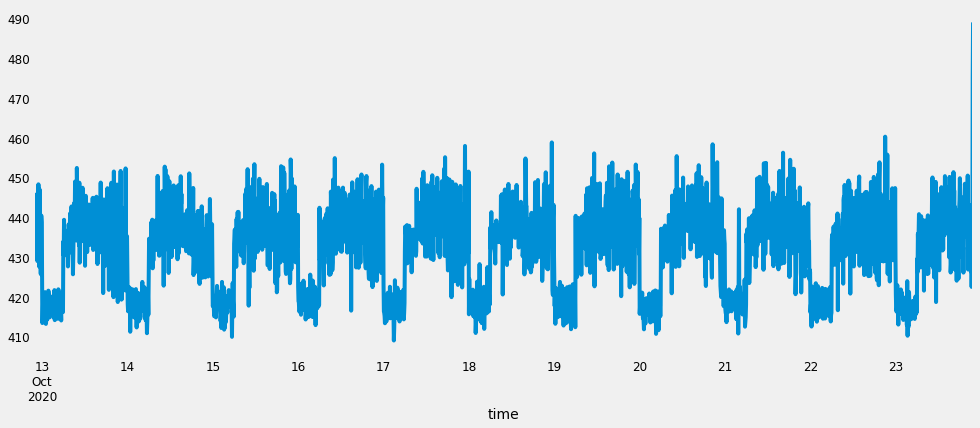

In [46]:
y = data_['request_rate'].resample('360S').mean()
y
y.plot(figsize=(15, 6))
plt.show()

In [47]:
exogenous = data_.drop(columns = ['request_rate']).resample('360S').mean()
exogenous.head()

,cpu_usage,memory
time,,
2020-10-12 21:36:00,32.830000,6.907085e+07
2020-10-12 21:42:00,32.377778,7.014878e+07
2020-10-12 21:48:00,32.361111,7.045166e+07
2020-10-12 21:54:00,32.077778,7.109131e+07
2020-10-12 22:00:00,32.572222,7.030738e+07


In [48]:
print(y.shape), print(exogenous.shape)

(2642,)
(2642, 2)


(None, None)

### Not resample

In [171]:
y = data_['request_rate']
exogenous = data_.drop(columns=['request_rate'])

In [176]:
print(exogenous), print(y), print(len(y)),  print(exogenous.shape)

                               cpu_usage    memory
time                                              
2020-10-12 21:37:07.769999981       31.6  71798784
2020-10-12 21:37:17.769999981       25.8  65302528
2020-10-12 21:37:27.769999981       36.1  65859584
2020-10-12 21:37:37.769999981       36.9  65826816
2020-10-12 21:37:47.769999981       36.9  65777664
...                                  ...       ...
2020-10-18 21:36:27.769999981       32.1  65998848
2020-10-18 21:36:37.769999981       31.7  66015232
2020-10-18 21:36:47.769999981       32.1  66228224
2020-10-18 21:36:57.769999981       31.3  66269184
2020-10-18 21:37:07.769999981       32.1  66269184

[51846 rows x 2 columns]
time
2020-10-12 21:37:07.769999981    426
2020-10-12 21:37:17.769999981    314
2020-10-12 21:37:27.769999981    461
2020-10-12 21:37:37.769999981    469
2020-10-12 21:37:47.769999981    463
                                ... 
2020-10-18 21:36:27.769999981    436
2020-10-18 21:36:37.769999981    433
2020-10-18

(None, None, None, None)

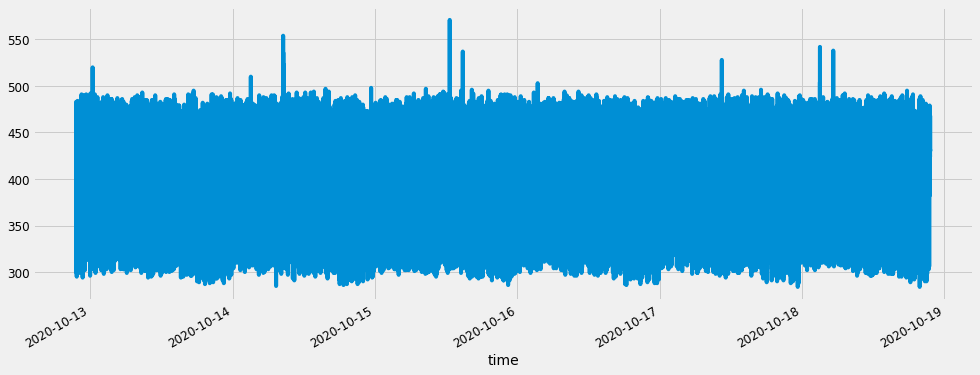

In [186]:
y.plot(figsize=(15, 6))
plt.show()

### check timeserie and apply decomposition

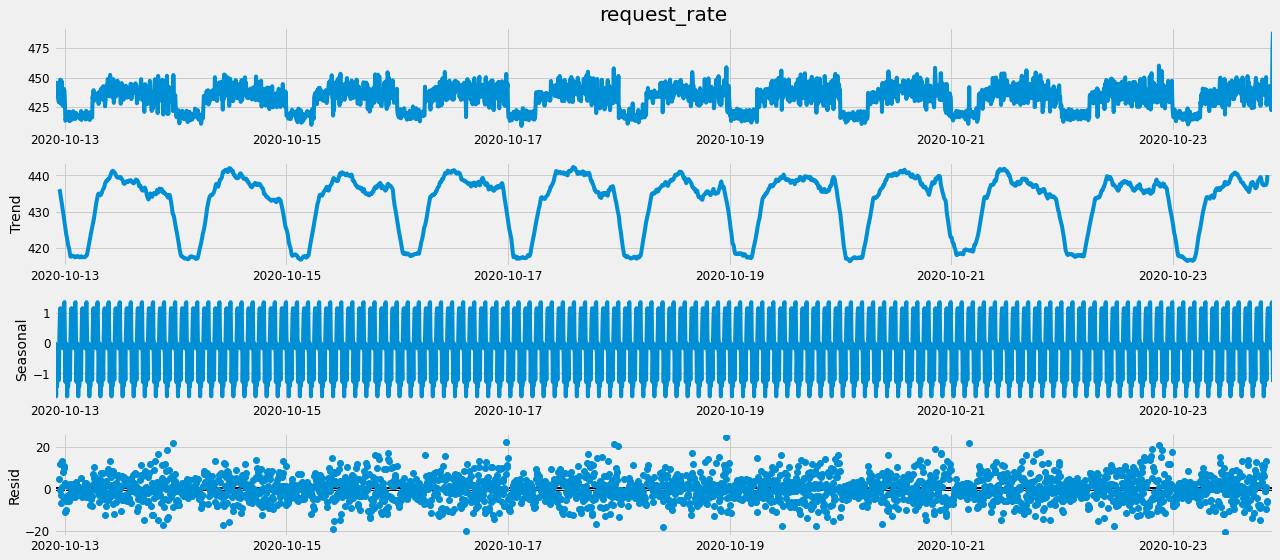

In [22]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, period = 24)
fig = decomposition.plot()
plt.show()

### ARIMA

In [269]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [270]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:39556.34633906146
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:35916.29461185763
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:19641.938866921482
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:19176.392697654752
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:19651.140026392713
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:19267.195061941497
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:19202.48073945619
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:19173.564713810105
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:35998.5093814391
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:32571.594272814335
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:19457.437181560323
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:18789.368937966494
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:19473.082756426025
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:18884.62593551219
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:18909.691652976908
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:18560.15827564273
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:18740.355098472115
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:18660.113548094097

In [271]:
mod = sm.tsa.statespace.SARIMAX(y, exog = exogenous, 
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cpu_usage      8.5796      0.075    114.519      0.000       8.433       8.726
memory      1.088e-06   7.05e-08     15.435      0.000    9.49e-07    1.23e-06
ar.L1          0.7747      0.037     20.669      0.000       0.701       0.848
ma.L1         -0.5909      0.050    -11.908      0.000      -0.688      -0.494
ma.S.L12      -0.7077      0.020    -35.605      0.000      -0.747      -0.669
sigma2         9.2482      0.286     32.287      0.000       8.687       9.810


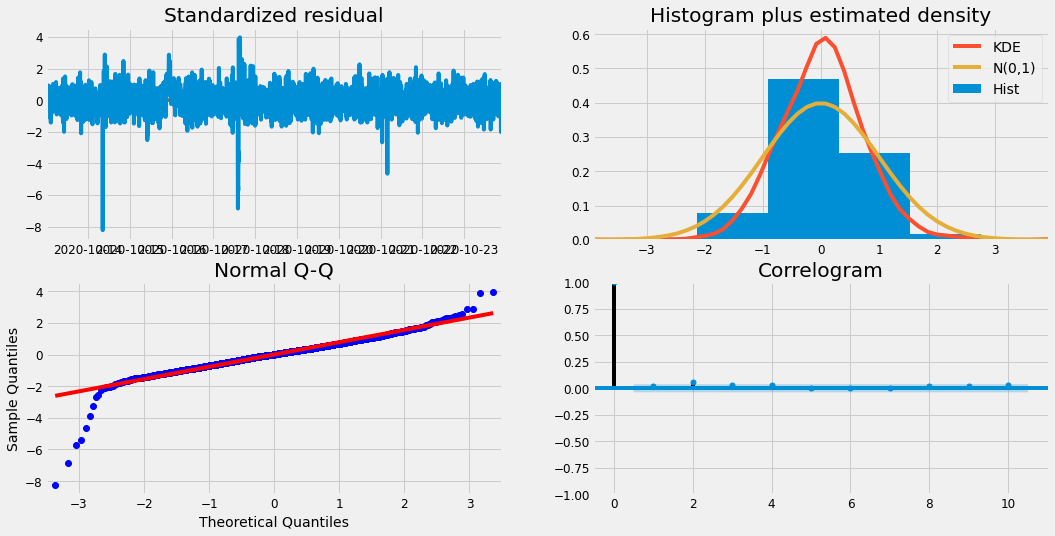

In [272]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [273]:
y

time
2020-10-12 21:36:00    431.400000
2020-10-12 21:42:00    430.000000
2020-10-12 21:48:00    435.888889
2020-10-12 21:54:00    433.305556
2020-10-12 22:00:00    436.111111
                          ...    
2020-10-23 21:18:00    422.527778
2020-10-23 21:24:00    436.166667
2020-10-23 21:30:00    436.277778
2020-10-23 21:36:00    475.270270
2020-10-23 21:42:00    489.000000
Freq: 360S, Name: request_rate, Length: 2642, dtype: float64

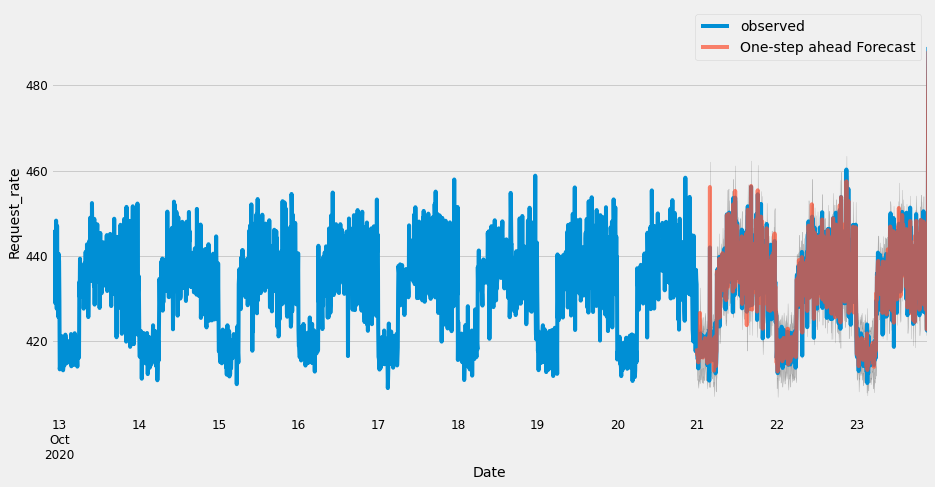

In [275]:
pred = results.get_prediction(start=pd.to_datetime('2020-10-21 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Request_rate')
plt.legend()
plt.show()

In [276]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-10-21 00:00:00':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 4.71
The Root Mean Squared Error of our forecasts is 2.17


In [277]:
from sklearn.metrics import r2_score
print('The R2 score of our forecasts is {} %'.format(round(r2_score(y_truth , y_forecasted), 2)*100))

The R2 score of our forecasts is 96.0 %


In [35]:
y_truth

time
2020-10-17 00:00:00    426.083333
2020-10-17 00:04:00    416.375000
2020-10-17 00:08:00    416.875000
2020-10-17 00:12:00    418.125000
2020-10-17 00:16:00    411.333333
                          ...    
2020-10-18 21:20:00    433.833333
2020-10-18 21:24:00    427.708333
2020-10-18 21:28:00    446.750000
2020-10-18 21:32:00    434.333333
2020-10-18 21:36:00    441.142857
Freq: 240S, Name: request_rate, Length: 685, dtype: float64

In [36]:
y_forecasted

time
2020-10-17 00:00:00    417.887548
2020-10-17 00:04:00    404.625616
2020-10-17 00:08:00    412.294917
2020-10-17 00:12:00    418.354911
2020-10-17 00:16:00    410.496748
                          ...    
2020-10-18 21:20:00    433.050458
2020-10-18 21:24:00    429.395746
2020-10-18 21:28:00    445.552998
2020-10-18 21:32:00    434.132620
2020-10-18 21:36:00    434.449152
Freq: 240S, Length: 685, dtype: float64

In [55]:
y

time
2020-10-12 21:36:00    436.777778
2020-10-12 21:40:00    427.000000
2020-10-12 21:44:00    429.666667
2020-10-12 21:48:00    436.500000
2020-10-12 21:52:00    434.750000
                          ...    
2020-10-18 21:20:00    433.833333
2020-10-18 21:24:00    427.708333
2020-10-18 21:28:00    446.750000
2020-10-18 21:32:00    434.333333
2020-10-18 21:36:00    441.142857
Freq: 240S, Name: request_rate, Length: 2161, dtype: float64

## Using *pmdarima* library for auto-arima 

In [23]:
from pmdarima.arima import auto_arima

step_wise=auto_arima(y, 
exogenous= exogenous,
start_p=1, start_q=1, 
max_p=7, max_q=7, 
d=1, max_d=7, 
#start_Q=1, start_P=1,
#D=1, max_P=7, max_Q=7, max_D=7,
trace=True, 
seasonal = True, 
m = 24,
error_action='ignore', 
suppress_warnings=True, 
stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[24] intercept   : AIC=11953.855, Time=12.00 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=12636.611, Time=0.64 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=12123.600, Time=8.99 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=11945.681, Time=9.41 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=30802.820, Time=0.52 sec
 ARIMA(0,1,1)(0,0,0)[24] intercept   : AIC=11944.803, Time=1.69 sec
 ARIMA(0,1,1)(1,0,0)[24] intercept   : AIC=11947.574, Time=8.36 sec
 ARIMA(0,1,1)(1,0,1)[24] intercept   : AIC=11947.727, Time=11.17 sec
 ARIMA(1,1,1)(0,0,0)[24] intercept   : AIC=11950.952, Time=1.95 sec
 ARIMA(0,1,2)(0,0,0)[24] intercept   : AIC=11943.332, Time=2.07 sec
 ARIMA(0,1,2)(1,0,0)[24] intercept   : AIC=11946.130, Time=9.99 sec
 ARIMA(0,1,2)(0,0,1)[24] intercept   : AIC=11944.163, Time=11.00 sec
 ARIMA(0,1,2)(1,0,1)[24] intercept   : AIC=11946.208, Time=12.27 sec
 ARIMA(1,1,2)(0,0,0)[24] intercept   : AIC=inf, Time=2.26 sec
 ARIMA(

In [24]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2642
Model:               SARIMAX(0, 1, 6)   Log Likelihood               -5946.007
Date:                Fri, 06 Nov 2020   AIC                          11910.013
Time:                        16:36:25   BIC                          11962.924
Sample:                    10-12-2020   HQIC                         11929.169
                         - 10-23-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cpu_usage     10.2372      0.055    186.695      0.000      10.130      10.345
memory      2.482e-06   4.94e-08     50.267      0.000    2.39e-06    2.58e-06
ma.L1         -0.5569      0.007    -74.391      0.000      -0.572      -0.542
ma.L2          0.0012      0.012      0.100      0.920      -0.022       0.024
ma.L3         -0.0401      0.018     -2.286      0.022      -0.074      -0.006
ma.L4         -0.0199      0.021     -0.946      0.344      -0.061       0.021
ma.L5         -0.0221      0.018     -1.223      0.221      -0.057       0.013
ma.L6         -0.0378      0.015     -2.587      0.010      -0.066      -0.009
sigma2         5.3114      0.093     57.225      0.000       5.129       5.493
===================================================================================
Ljung-Box (Q):                       27.88   Jarque-Bera (JB):             91798.53
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -1.53
Prob(H) (two-sided):                  0.04   Kurtosis:                        31.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
train_size=int(len(y) *0.7)
test_size = int(len(y)) - train_size

y_train = y[:train_size]
y_test = y[train_size:]

exogenous_train = exogenous[:train_size] 
exogenous_test = exogenous[train_size:]

print(y_train.shape, y_test.shape, exogenous_train.shape, exogenous_test.shape)

(1849,) (793,) (1849, 2) (793, 2)


In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

model= SARIMAX(y_train, 
exog=exogenous_train,
order=(0,1,0),              #### Tο τριτο ή 0 ή 6 αναλόγως
enforce_invertibility=False, 
enforce_stationarity=False
            )

In [27]:
steps=-1
#fit the model
results= model.fit()
#predict
predictions= results.predict(start = train_size, end = train_size+test_size-1 ,#+(steps)-1, 
                             exog = exogenous_test)

### We can also use this 
forecast_1= results.forecast(steps=test_size-1, exog=exogenous_test)

In [28]:
forecast_1= results.forecast(steps=test_size, exog=exogenous_test)

In [29]:
act = pd.DataFrame(y.iloc[train_size:])

In [30]:
act

,request_rate
time,
2020-10-20 14:30:00,444.388889
2020-10-20 14:36:00,435.000000
2020-10-20 14:42:00,448.027778
2020-10-20 14:48:00,438.555556
2020-10-20 14:54:00,439.083333
...,...
2020-10-23 21:18:00,422.527778
2020-10-23 21:24:00,436.166667
2020-10-23 21:30:00,436.277778


In [31]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=exogenous_test.index
predictions['Actual'] = act['request_rate']
predictions.rename(columns={0:'Pred'}, inplace=True)

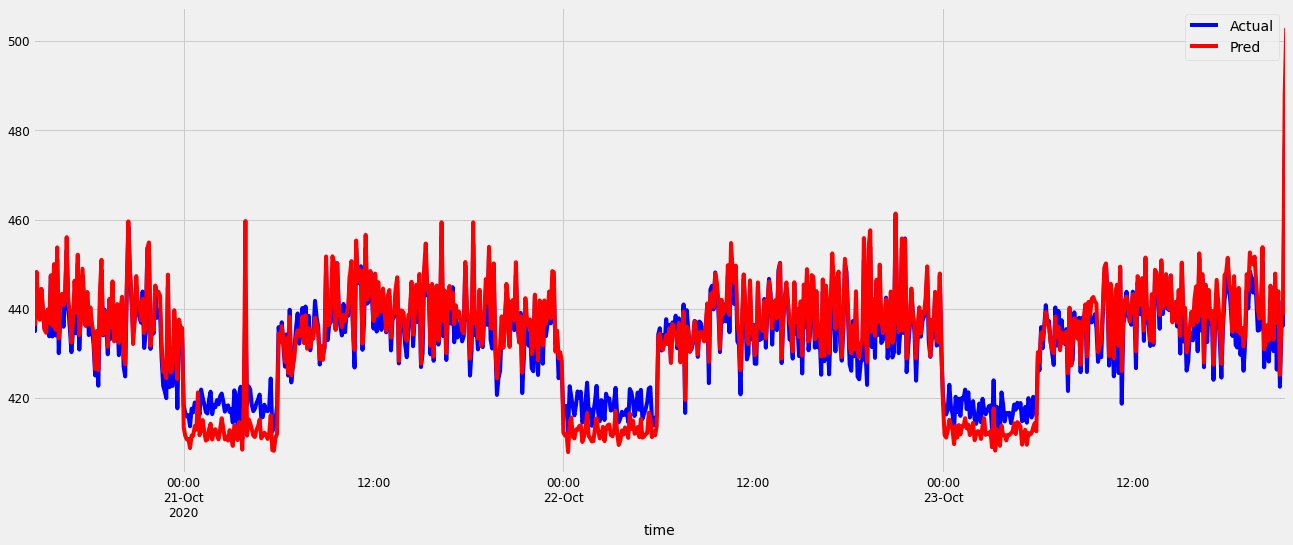

In [32]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))

In [33]:
predictions

,Pred,Actual
time,,
2020-10-20 14:30:00,444.514282,444.388889
2020-10-20 14:36:00,436.531622,435.000000
2020-10-20 14:42:00,448.258848,448.027778
2020-10-20 14:48:00,439.085872,438.555556
2020-10-20 14:54:00,437.538776,439.083333
...,...,...
2020-10-23 21:18:00,425.236443,422.527778
2020-10-23 21:24:00,438.381312,436.166667
2020-10-23 21:30:00,438.945291,436.277778


In [34]:
forecast_apple= pd.DataFrame(forecast_1)
forecast_apple.reset_index(drop=True, inplace=True)
forecast_apple.index=exogenous_test.index
forecast_apple['Actual'] =y.iloc[train_size:]
forecast_apple.rename(columns={0:'Forecast'}, inplace=True)

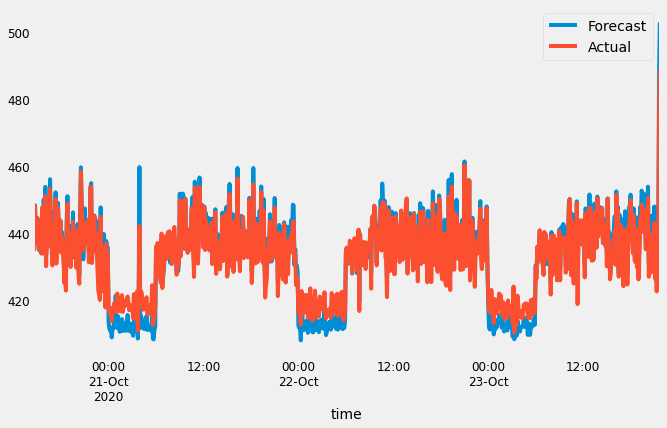

In [35]:
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['axes.grid'] = False

forecast_apple['Forecast'].plot(legend=True)
forecast_apple['Actual'].plot(legend=True)

In [36]:
from statsmodels.tools.eval_measures import rmse
error=rmse(predictions['Pred'], predictions['Actual'])
error

3.720784323069218

In [37]:
from sklearn.metrics import r2_score

r2score = r2_score(predictions['Actual'] , predictions['Pred'])
print('The R2 score of our forecasts is {} %'.format(round(r2score,2)*100))

The R2 score of our forecasts is 88.0 %


## De-trend (Αν χρειάζεται, αν και νομιζω δεν χρειαζεται γιατι το p-value του dickey fuller test βγαινει 0)

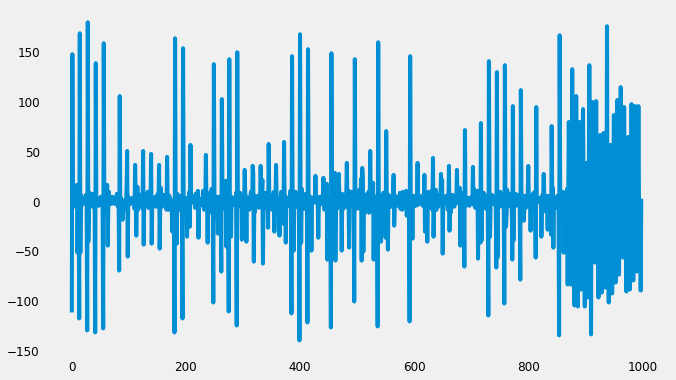

In [121]:
X = data_['request_rate'][:1000].values
diff = list()
for i in range(1, len(X)):
	value = X[i] - X[i - 1]
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

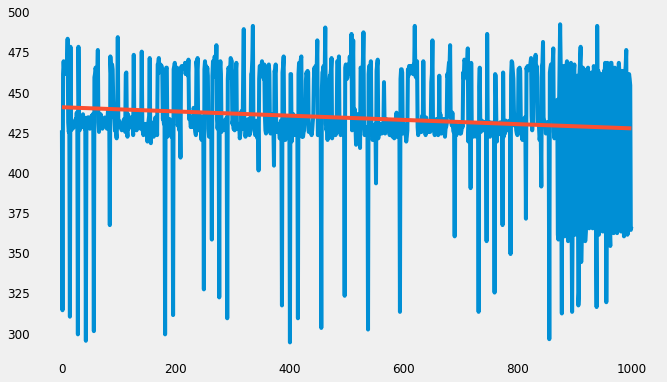

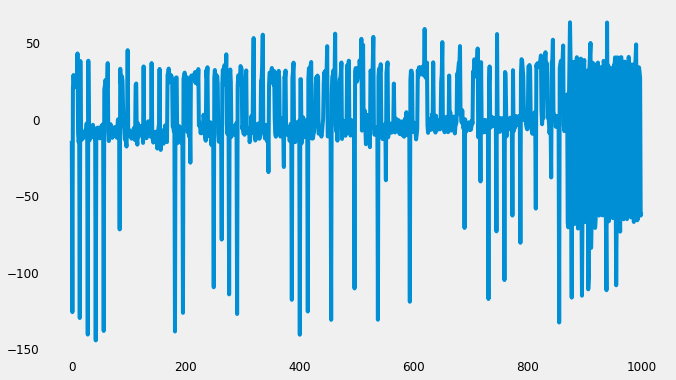

In [124]:
import numpy
import sklearn
from sklearn.linear_model import LinearRegression
# fit linear model
X = [i for i in range(0, len(data_['request_rate'][:1000]))]
X = numpy.reshape(X, (len(X), 1))
y = data_['request_rate'][:1000].values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(data_['request_rate'][:1000]))]
# plot detrended
pyplot.plot(detrended)
pyplot.show()

### check Dickey fuller's test (for stationarity)

In [38]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

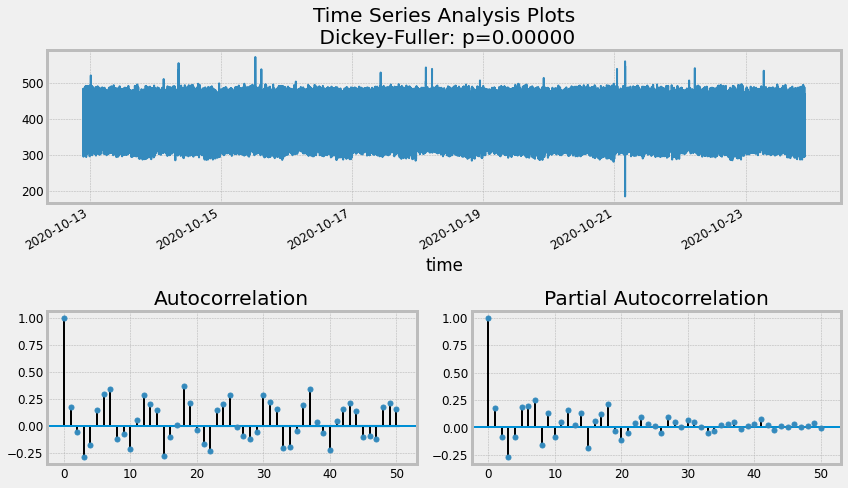

In [39]:
tsplot(data_.request_rate)


In [40]:
from statsmodels.tsa.stattools import adfuller
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)
 
y = data_.request_rate
test_adf(y, "request_rate")

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is Stationary
Data is Stationary request_rate


## Autocorrelation

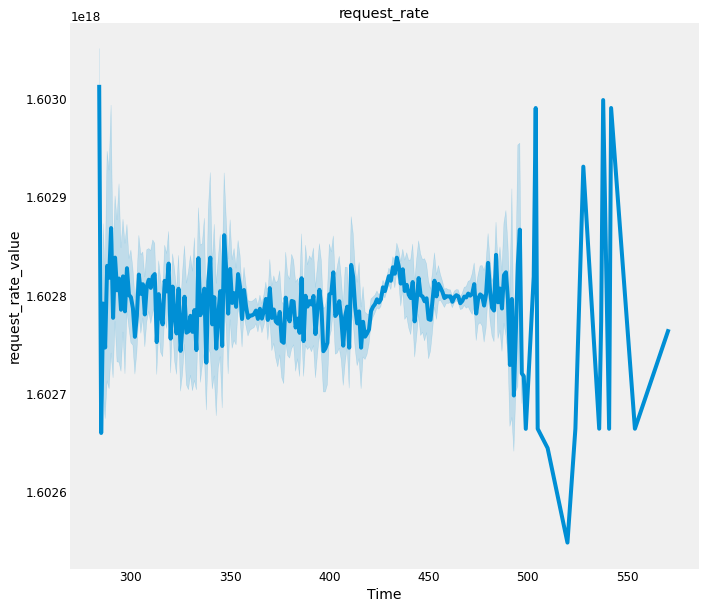

In [130]:
import os
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import seaborn
import matplotlib.pyplot as plt
import numpy

df  = data.reset_index()
df.head()
df['time'] = df['time'].astype(int)

plt.figure(figsize=(10, 10))
g = sns.lineplot(data=df,x="request_rate", y = "time")
g.set_title('request_rate')
g.set_xlabel('Time')
g.set_ylabel('request_rate_value')
lag = [i for i in range(0,8000)]
data_acf = []
for l in lag:
    data_acf.append(df['request_rate'].autocorr(1))

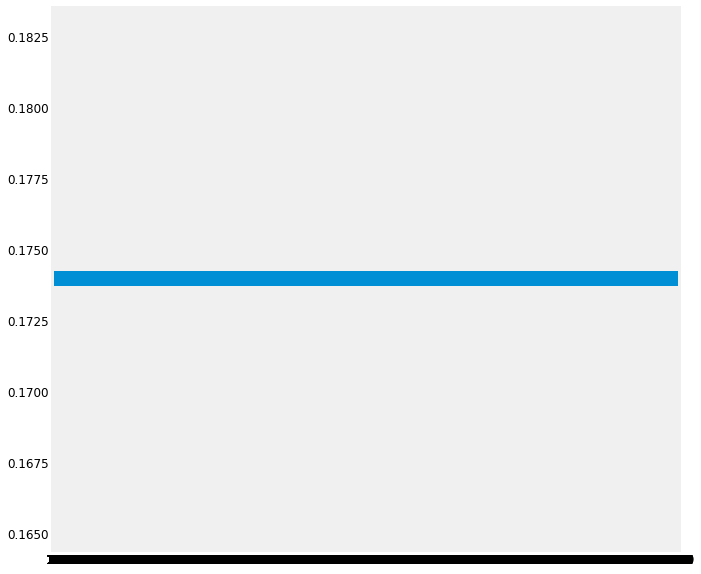

In [131]:
plt.figure(figsize=(10, 10))
sns.pointplot(x=lag, y=data_acf, markers='.')
'''g.set_title('Autocorrelation function for data')
g.set_xlabel('Lag in terms of number of trading days')
g.set_ylabel('Autocorrelation function')
g.set_xticklabels(lag, rotation=90)'''
plt.show()

#plt.savefig('/home/giwrikas/Downloads/figure.png', format='png', dpi=300)

# LSTM

### Prepare data for LSTM

In [226]:
print(data_.head())
print(data_.shape)

                               request_rate  cpu_usage    memory
time                                                            
2020-10-12 21:37:07.769999981           426       31.6  71798784
2020-10-12 21:37:17.769999981           314       25.8  65302528
2020-10-12 21:37:27.769999981           461       36.1  65859584
2020-10-12 21:37:37.769999981           469       36.9  65826816
2020-10-12 21:37:47.769999981           463       36.9  65777664
(51846, 3)


In [49]:
### if needed put request rate as first column

col_name="request_rate"
first_col = data_.pop(col_name)
data_.insert(0, col_name, first_col)

In [50]:
data_resampled = exogenous
data_resampled['request_rate'] = y 
col_name="request_rate"
first_col = data_resampled.pop(col_name)
data_resampled.insert(0, col_name, first_col)
print(data_resampled.head())
print(data_resampled.shape)

                     request_rate  cpu_usage        memory
time                                                      
2020-10-12 21:36:00    431.400000  32.830000  6.907085e+07
2020-10-12 21:42:00    430.000000  32.377778  7.014878e+07
2020-10-12 21:48:00    435.888889  32.361111  7.045166e+07
2020-10-12 21:54:00    433.305556  32.077778  7.109131e+07
2020-10-12 22:00:00    436.111111  32.572222  7.030738e+07
(2642, 3)


In [71]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
values = data_resampled.values
# integer encode direction
#encoder = LabelEncoder()
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag steps
n_steps = 24                 
n_features = 3
# frame as supervised learning
reframed = series_to_supervised(scaled, n_steps , 1)
# drop columns we don't want to predict
reframed.drop(columns=['var2(t)','var3(t)'], axis=1, inplace=True)
#reframed.drop(reframed.columns[[37,38,39,40,41]], axis=1, inplace=True)
#reframed = reframed[['var1(t-6)' , 'var2(t-6)' , 'var3(t-6)' , 'var4(t-6)' , 'var5(t-6)', 'var6(t-6)','var1(t)']]
print(reframed.head())

    var1(t-24)  var2(t-24)  var3(t-24)  var1(t-23)  var2(t-23)  var3(t-23)  \
24   -0.441001   -0.502372    0.564806   -0.476025   -0.614301    0.741972   
25   -0.476025   -0.614301    0.741972   -0.328700   -0.618426    0.791753   
26   -0.328700   -0.618426    0.791753   -0.393329   -0.688553    0.896886   
27   -0.393329   -0.688553    0.896886   -0.323141   -0.566174    0.768041   
28   -0.323141   -0.566174    0.768041   -0.337040   -0.380543    0.539990   

    var1(t-22)  var2(t-22)  var3(t-22)  var1(t-21)  ...  var1(t-3)  var2(t-3)  \
24   -0.328700   -0.618426    0.791753   -0.393329  ...  -0.583738  -0.748367   
25   -0.393329   -0.688553    0.896886   -0.323141  ...  -0.214037  -0.273291   
26   -0.323141   -0.566174    0.768041   -0.337040  ...  -0.256428  -0.415606   
27   -0.337040   -0.380543    0.539990   -0.083391  ...  -0.487839  -0.669990   
28   -0.083391   -0.209351    0.552594   -0.236970  ...  -0.890201  -0.901685   

    var3(t-3)  var1(t-2)  var2(t-2)  var3(t-

In [72]:
print(reframed.shape)

(2618, 73)


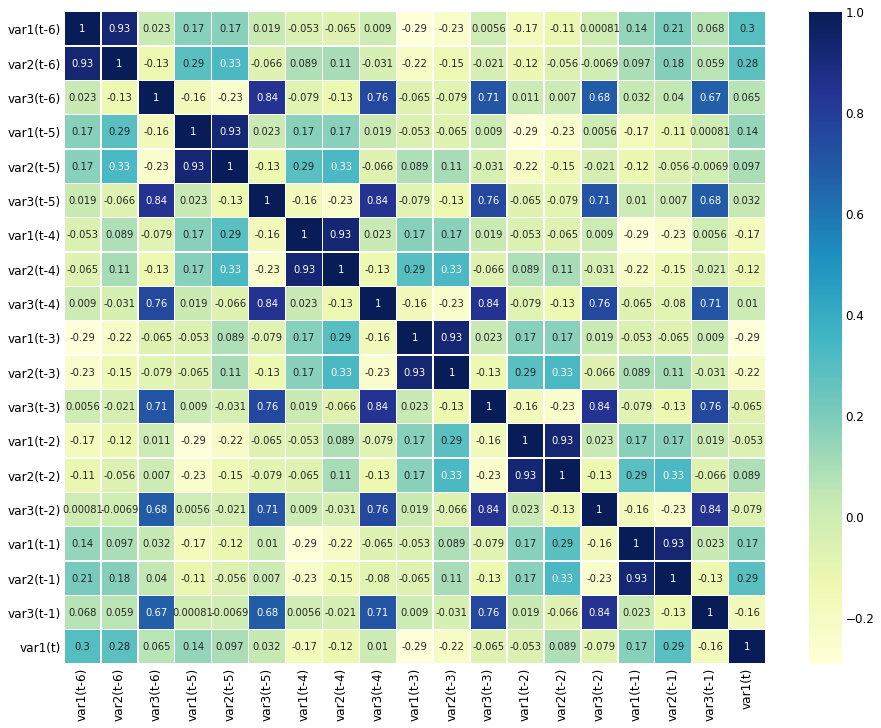

In [135]:
mpl.rcParams['figure.figsize'] = (14, 12)

import seaborn as sns
sns.heatmap(reframed.corr(),cmap="YlGnBu",  linewidths=.5, annot=True)


In [137]:
values.shape

(51846, 3)

### Train test split and reshape for training on 1 lag step at each time

In [953]:
# split into train and test sets
values = reframed.values
# Sizes
train_size=int(len(y) *0.6)
test_size = int(len(y) *0.2)
valid_size = int(len(y) *0.2)

train = values[:train_size]
test = values[train_size:train_size+test_size]
val = values[train_size+test_size:]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
val_X, val_y = val[:, :-1], val[:, -1]
print(train_X.shape)

### this reshape below is we using it for univariate timeseries
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0],1,train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0],1,test_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0],1,val_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape, val_X.shape, val_y.shape)

(15500, 36)
(15500, 6, 6) (15500,) (5184, 6, 6) (5184,) (5233, 6, 6) (5233,)


### Train test split and reshape for multiple lag steps at each time

In [73]:
# split into train and test sets
values = reframed.values
# Sizes
train_size=int(len(y) *0.6)
test_size = int(len(y) *0.2)
valid_size = int(len(y) *0.2)

train = values[:train_size]
test = values[train_size:train_size+test_size]
val = values[train_size+test_size:]
# split into input and outputs

n_obs = n_steps * n_features

train_X, train_y = train[:, :n_obs], train[:, -1]
test_X, test_y = test[:, :n_obs], test[:, -1]
val_X, val_y = val[:, :n_obs], val[:, -1]

print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_steps, n_features))
test_X = test_X.reshape((test_X.shape[0], n_steps, n_features))
val_X = val_X.reshape((val_X.shape[0], n_steps, n_features))


print(train_X.shape, train_y.shape, test_X.shape, test_y.shape, val_X.shape, val_y.shape)

(1585, 72) 1585 (1585,)
(1585, 24, 3) (1585,) (528, 24, 3) (528,) (505, 24, 3) (505,)


In [74]:
train_X.shape

(1585, 24, 3)

## LSTM

In [87]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, MaxPooling3D, Flatten
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import Conv1D, Conv3D

# design network
model = Sequential()
model.add(LSTM(90, return_sequences = True,  input_shape=(train_X.shape[1], train_X.shape[2])))  # 1 , 2 
model.add(Dropout(0.2))
model.add(LSTM(60, return_sequences = False ))
model.add(Dropout(0.2))
#model.add(LSTM(30, return_sequences = False ))
#model.add(Dropout(0.2))
#model.add(LSTM(15, return_sequences = False ))
#model.add(Dense(50))
#model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
# fit network
model.fit(train_X, train_y, epochs=150, batch_size=128, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Epoch 1/150
13/13 - 1s - loss: 0.0780 - val_loss: 0.0368
Epoch 2/150
13/13 - 0s - loss: 0.0446 - val_loss: 0.0376
Epoch 3/150
13/13 - 0s - loss: 0.0441 - val_loss: 0.0426
Epoch 4/150
13/13 - 0s - loss: 0.0434 - val_loss: 0.0332
Epoch 5/150
13/13 - 0s - loss: 0.0369 - val_loss: 0.0337
Epoch 6/150
13/13 - 0s - loss: 0.0369 - val_loss: 0.0325
Epoch 7/150
13/13 - 0s - loss: 0.0292 - val_loss: 0.0315
Epoch 8/150
13/13 - 0s - loss: 0.0298 - val_loss: 0.0309
Epoch 9/150
13/13 - 0s - loss: 0.0289 - val_loss: 0.0307
Epoch 10/150
13/13 - 0s - loss: 0.0288 - val_loss: 0.0305
Epoch 11/150
13/13 - 0s - loss: 0.0289 - val_loss: 0.0303
Epoch 12/150
13/13 - 0s - loss: 0.0286 - val_loss: 0.0303
Epoch 13/150
13/13 - 0s - loss: 0.0285 - val_loss: 0.0302
Epoch 14/150
13/13 - 0s - loss: 0.0286 - val_loss: 0.0300
Epoch 15/150
13/13 - 0s - loss: 0.0283 - val_loss: 0.0299
Epoch 16/150
13/13 - 0s - loss: 0.0280 - val_loss: 0.0301
Epoch 17/150
13/13 - 0s - loss: 0.0282 - val_loss: 0.0298
Epoch 18/150
13/13 - 0s

Epoch 142/150
13/13 - 0s - loss: 0.0246 - val_loss: 0.0284
Epoch 143/150
13/13 - 0s - loss: 0.0245 - val_loss: 0.0277
Epoch 144/150
13/13 - 0s - loss: 0.0245 - val_loss: 0.0279
Epoch 145/150
13/13 - 0s - loss: 0.0233 - val_loss: 0.0276
Epoch 146/150
13/13 - 0s - loss: 0.0241 - val_loss: 0.0277
Epoch 147/150
13/13 - 0s - loss: 0.0242 - val_loss: 0.0277
Epoch 148/150
13/13 - 0s - loss: 0.0248 - val_loss: 0.0283
Epoch 149/150
13/13 - 0s - loss: 0.0241 - val_loss: 0.0279
Epoch 150/150
13/13 - 0s - loss: 0.0238 - val_loss: 0.0276


### Model Summary

In [88]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 24, 90)            33840     
_________________________________________________________________
dropout_21 (Dropout)         (None, 24, 90)            0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 60)                36240     
_________________________________________________________________
dropout_22 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 61        
Total params: 70,141
Trainable params: 70,141
Non-trainable params: 0
_________________________________________________________________


### Plot

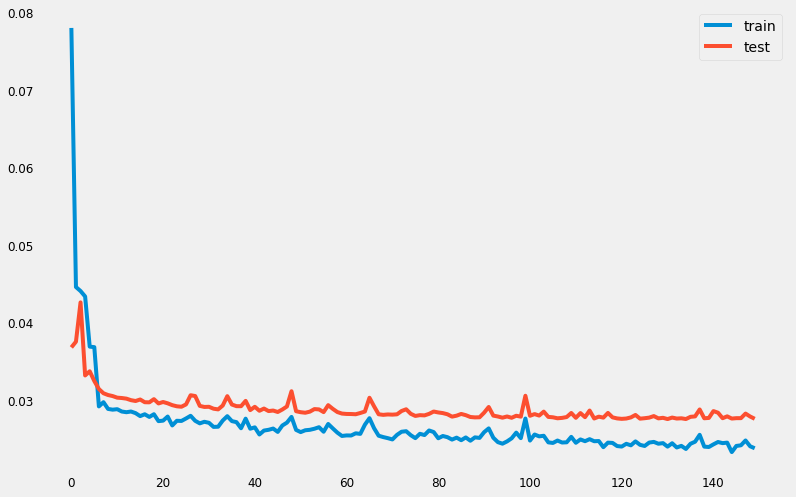

In [89]:
mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['axes.grid'] = False
# plot history
plt.plot(model.history.history['loss'], label='train')
plt.plot(model.history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Test and validation score for univariate time series

### Test score

In [ ]:
from numpy import concatenate
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

# make a prediction
yhat = model.predict(test_X)
test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat_1 = concatenate((yhat, test_X_reshaped[:, 1:]), axis=1)
inv_yhat_2 = scaler.inverse_transform(inv_yhat_1)
inv_yhat_3 = inv_yhat_2[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y_1 = concatenate((test_y, test_X_reshaped[:, 1:]), axis=1)
inv_y_2 = scaler.inverse_transform(inv_y_1)
inv_y_3 = inv_y_2[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_2, inv_yhat_2))
r2score = r2_score(inv_y_3, inv_yhat_3)
print('Test RMSE: %.3f' % rmse)
print('R2_score: %.3f' % r2score)

In [ ]:
inv_yhat_3 = inv_yhat_1[:,0]
inv_y_3 = inv_y_1[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_3, inv_yhat_3))
r2score = r2_score(inv_y_3, inv_yhat_3)
print('Test RMSE: %.3f' % rmse)
print('R2_score: %.3f' % r2score)

### Validation Score 

In [ ]:
from numpy import concatenate
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

# make a prediction
yhat = model.predict(val_X)
val_X_reshaped = val_X.reshape((val_X.shape[0], val_X.shape[2]))
# invert scaling for forecast
inv_yhat_1 = concatenate((yhat, val_X_reshaped[:, 1:]), axis=1)
inv_yhat_2 = scaler.inverse_transform(inv_yhat_1)
inv_yhat_3 = inv_yhat_2[:,0]
# invert scaling for actual
val_y = val_y.reshape((len(val_y), 1))
inv_y_1 = concatenate((val_y, val_X_reshaped[:, 1:]), axis=1)
inv_y_2 = scaler.inverse_transform(inv_y_1)
inv_y_3 = inv_y_2[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_2, inv_yhat_2))
r2score = r2_score(inv_y_3, inv_yhat_3)
print('Test RMSE: %.3f' % rmse)
print('R2_score: %.3f' % r2score)

### Test and validation score for multivariate timeseries 

### Test score 

In [90]:
from numpy import concatenate
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

# make a prediction
yhat = model.predict(test_X)
test_X_reshaped = test_X.reshape((test_X.shape[0], n_steps*n_features))
yhat_reshaped = yhat.reshape((yhat.shape[0], yhat.shape[1]))

# invert scaling for forecast
inv_yhat_1 = concatenate((yhat_reshaped, test_X_reshaped[:, -71:]), axis=1)
#inv_yhat_2 = scaler.inverse_transform(inv_yhat_1)
inv_yhat_3 = inv_yhat_1[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y_1 = concatenate((test_y, test_X_reshaped[:, -71:]), axis=1)
#inv_y_2 = scaler.inverse_transform(inv_y_1)
inv_y_3 = inv_y_1[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_3, inv_yhat_3))
r2score = r2_score(inv_y_3, inv_yhat_3)
print('Test RMSE: %.3f' % rmse)
print('R2_score: %.3f' % r2score)

Test RMSE: 0.166
R2_score: 0.605


In [77]:
yhat.shape

(528, 24, 1)

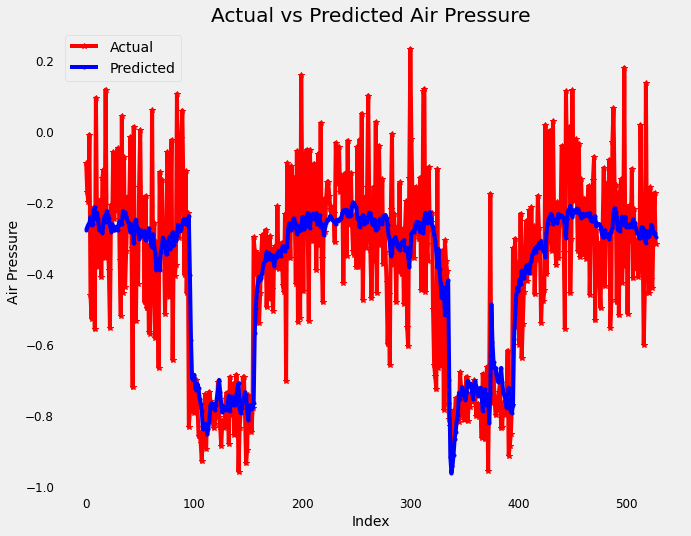

In [91]:
#Let's plot the first 50 actual and predicted values of air pressure.
plt.figure(figsize=(10,8))
plt.plot(inv_y_3, linestyle='-', marker='*', color='r')
plt.plot(inv_yhat_3, linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Air Pressure')
plt.ylabel('Air Pressure')
plt.xlabel('Index')
plt.savefig('/home/giwrikas/Downloads/B07887_05_05.png', format='png', dpi=300)

### Validation score

In [92]:
# make a prediction
val_yhat = model.predict(val_X)
val_X_reshaped = val_X.reshape((val_X.shape[0], n_steps*n_features))
val_yhat_reshaped = val_yhat.reshape((val_yhat.shape[0], val_yhat.shape[1]))

# invert scaling for forecast
inv_yhat_1 = concatenate((val_yhat_reshaped, val_X_reshaped[:, -71:]), axis=1)
#inv_yhat_2 = scaler.inverse_transform(inv_yhat_1)
inv_yhat_3 = inv_yhat_1[:,0]
# invert scaling for actual
val_y = val_y.reshape((len(val_y), 1))
inv_y_1 = concatenate((val_y, val_X_reshaped[:, -71:]), axis=1)
#inv_y_2 = scaler.inverse_transform(inv_y_1)
inv_y_3 = inv_y_1[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_3, inv_yhat_3))
r2score = r2_score(inv_y_3, inv_yhat_3)
print('Test RMSE: %.3f' % rmse)
print('R2_score: %.3f' % r2score)

Test RMSE: 0.180
R2_score: 0.543


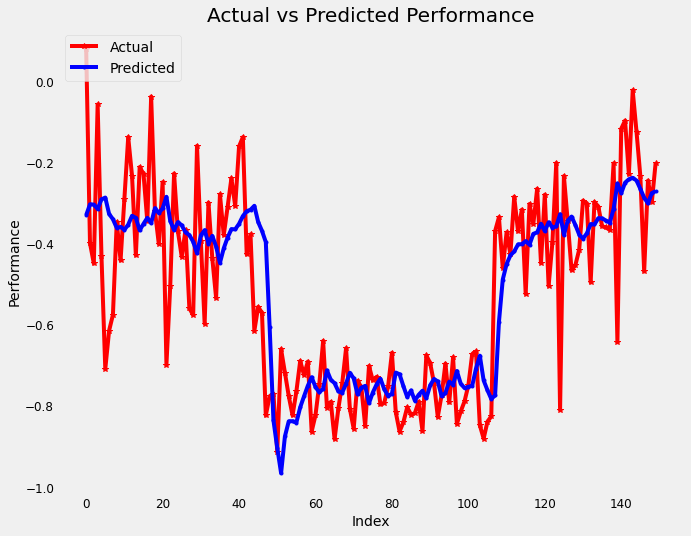

In [93]:
#Let's plot the first 50 actual and predicted values of air pressure.
plt.figure(figsize=(10,8))
plt.plot(inv_y_3[:150], linestyle='-', marker='*', color='r')
plt.plot(inv_yhat_3[:150], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Performance')
plt.ylabel('Performance')
plt.xlabel('Index')
plt.savefig('/home/giwrikas/Downloads/B07887_05_05.png', format='png', dpi=300)